In [18]:
###imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

import acquire as acq
import prepare as prep

from sklearn.model_selection import TimeSeriesSplit

# plotting defaults
#plt.rc('figure', figsize=(10, 5))
plt.style.use('seaborn-whitegrid')
#plt.rc('font', size=16)

In [19]:
#load my csv
df = pd.read_csv('ts_superstore.csv', skiprows=1, index_col=0)

In [20]:
#use function for prepped data
df = prep.prep_ts_superstore(df)

In [21]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,year,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,1,2013,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,2013,30.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,1,2013,308.48
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,2013,197.55
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,2013,25.16


In [22]:
print('Date Range:', df.index.min(), 'to', df.index.max())

Date Range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00


In [23]:
df.shape

(913000, 19)

In [24]:
train = df.loc[:'2016'].copy()
test = df.loc['2017':].copy()

In [25]:
train.shape

(730500, 19)

In [26]:
test.shape

(182500, 19)

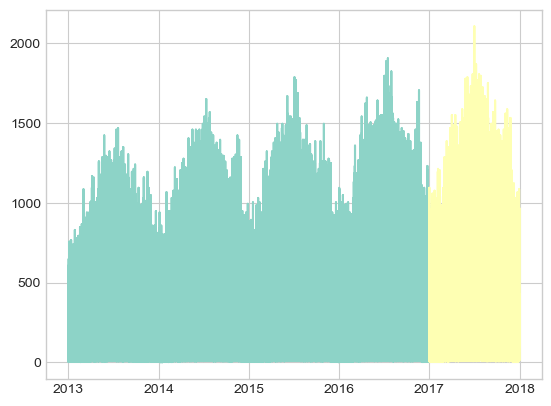

In [27]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.show()

In [28]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

In [29]:
# Drop columns from train dataframe
train = train[['month', 'day_of_week', 'year', 'sales_total']]

# Drop columns from test dataframe
test = test[['month', 'day_of_week', 'year', 'sales_total']]

In [30]:
train.head()

,month,day_of_week,year,sales_total
sale_date,,,,
2013-01-01,1,1,2013,10.92
2013-01-01,1,1,2013,30.16
2013-01-01,1,1,2013,308.48
2013-01-01,1,1,2013,197.55
2013-01-01,1,1,2013,25.16


train.groupby(train.index.month, train.index.year).sales_total.sum()\
.plot.bar().tick_params('x', rotation=0)

plt.title('mean sales_total by month')
plt.show()

In [31]:
train.groupby([train.index.month, train.index.year])['sales_total'].sum().mean(level=[0,1])

sale_date  sale_date
1          2013         2447368.20
           2014         2827367.26
           2015         2971740.70
           2016         3237958.05
2          2013         2469765.97
           2014         2844899.71
           2015         2962257.74
           2016         3305673.92
3          2013         3319815.58
           2014         3789579.36
           2015         3932960.55
           2016         4252694.79
4          2013         3666901.23
           2014         4241791.36
           2015         4427214.12
           2016         4851928.10
5          2013         4102278.40
           2014         4747146.84
           2015         4988111.92
           2016         5316288.92
6          2013         4278919.18
           2014         4874480.64
           2015         5037761.76
           2016         5494743.33
7          2013         4601659.23
           2014         5314161.05
           2015         5575319.12
           2016         6121775.95

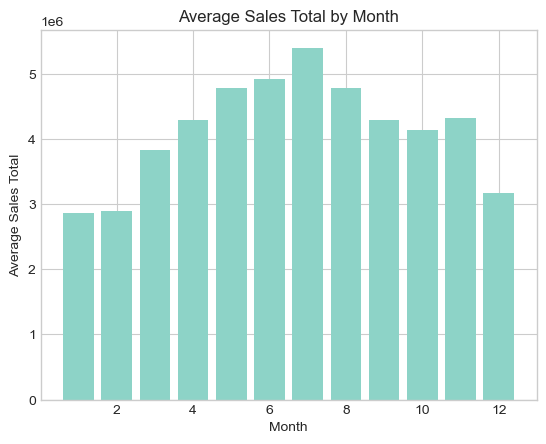

In [32]:
# calculate average sales_total of each month across the years
avg_monthly_sales = train.groupby([train.index.month, train.index.year])['sales_total'].sum().mean(level=[0])

# create a bar plot
plt.bar(avg_monthly_sales.index, avg_monthly_sales.values)
plt.title('Average Sales Total by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales Total')
plt.show()

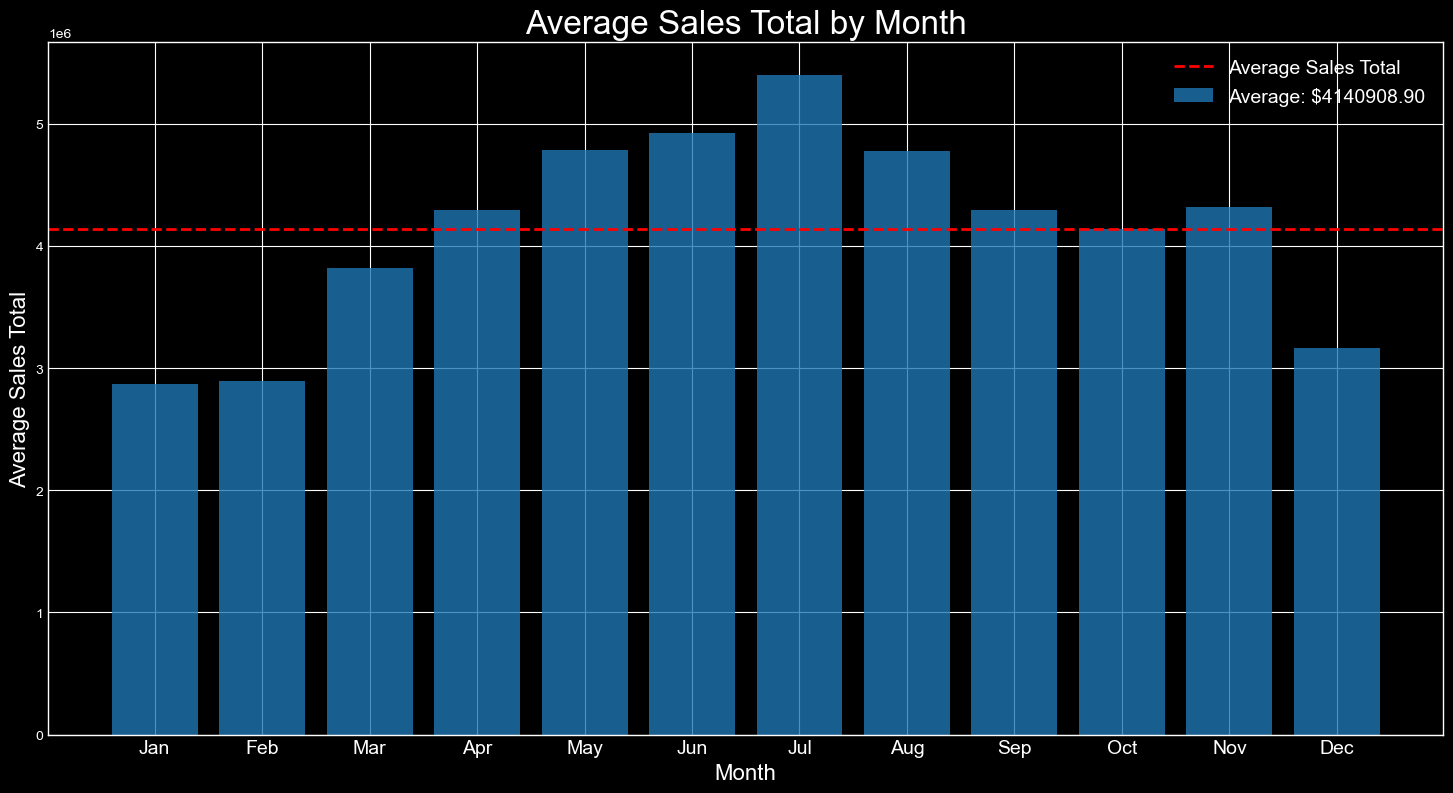

In [33]:
# Set the color scheme
plt.style.use('dark_background')

# Calculate average sales_total of each month across the years
avg_monthly_sales = train.groupby([train.index.month, train.index.year])['sales_total'].sum().mean(level=[0])

# Create a bar plot with custom colors and opacity
fig, ax = plt.subplots(figsize=(18,9))
ax.bar(avg_monthly_sales.index, avg_monthly_sales.values, color='#1f77b4', alpha=0.8)

# Add a horizontal line at the average sales total
avg_sales_total = np.mean(avg_monthly_sales.values)
ax.axhline(avg_sales_total, color='red', linestyle='--', linewidth=2)

# Add a title and adjust the font size
ax.set_title('Average Sales Total by Month', fontsize=24)

# Add labels to the x and y axes and adjust the font size
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Average Sales Total', fontsize=16)

# Set the x-axis ticks to show the month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(np.arange(1, 13))
ax.set_xticklabels(month_names, fontsize=14)

# Add a legend and adjust the font size
ax.legend(['Average Sales Total', f'Average: ${avg_sales_total:.2f}'], fontsize=14)

# Show the plot
plt.show()

### Observation:
* Traditionally the warmer the month the more people shop in San Antonio. With one exception it's my theory that people spend more in November in preparation for Christmas.

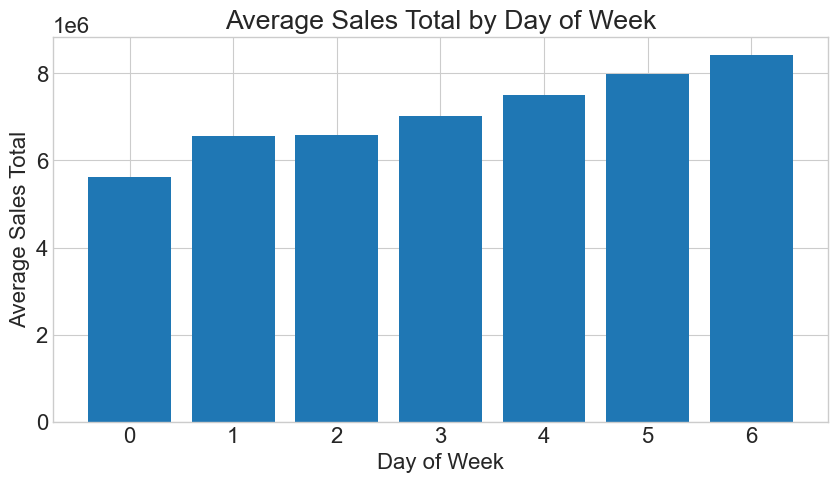

In [34]:
# calculate average sales_total of each month across the years
avg_monthly_sales = train.groupby([train.index.day_of_week, train.index.year])['sales_total'].sum().mean(level=[0])

# create a bar plot
plt.bar(avg_monthly_sales.index, avg_monthly_sales.values)
plt.title('Average Sales Total by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales Total')
plt.show()

### Observation:
* If Monday is represented by '0' day of the week, as the week progresses they spend more with a culmination of the highest spending day on Sunday.

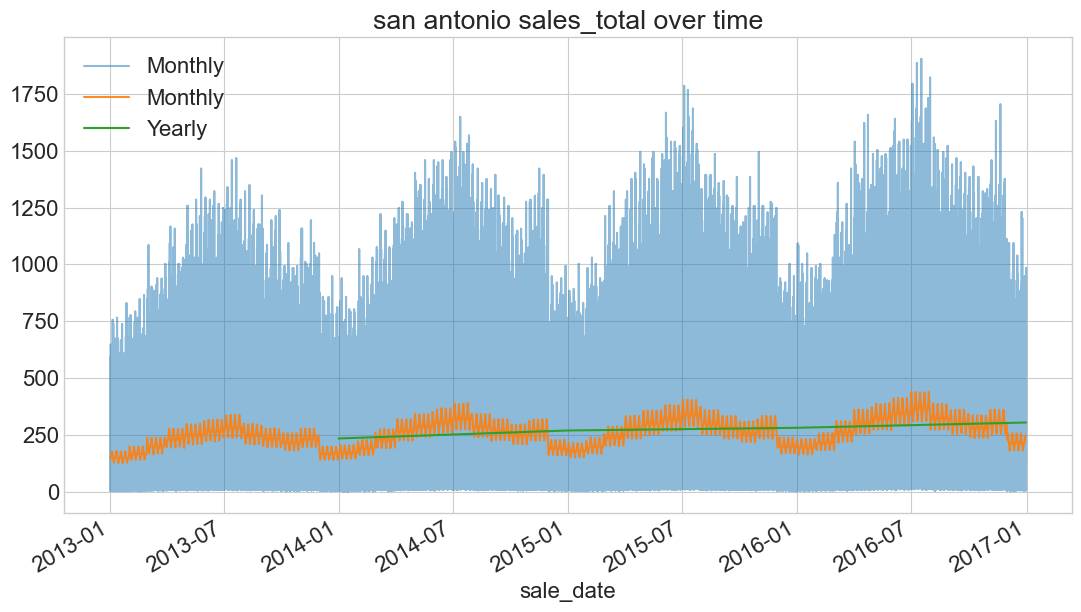

In [25]:
y.plot(alpha=0.5, label='Monthly')

# y.resample('a').mean().plot(alpha=0.5, label='Daily')
y.resample('b').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')

plt.title('san antonio sales_total over time')
plt.legend()
plt.show()

### Observation:
* It seems sales over time is consistent by year and month. I believe the ever so slow increase is probably inflation. However, the pattern is the same.

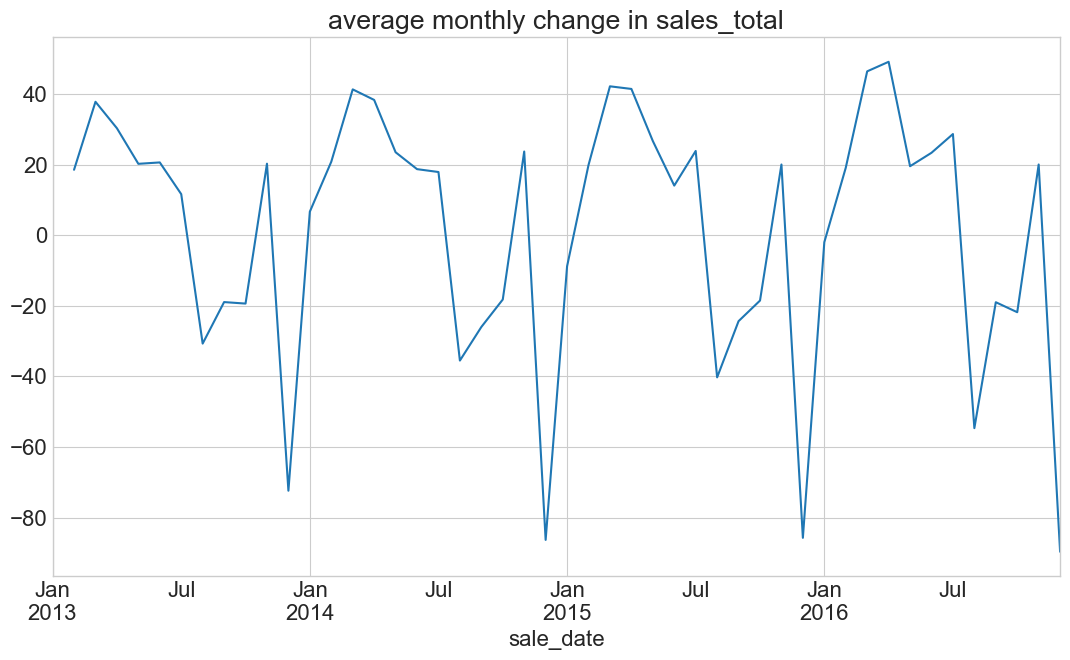

In [26]:
y.resample('M').mean().diff().plot(title='average monthly change in sales_total');

### Observation:
* I believe the monthly diff big dip at the end of the comes when spending drops off around Christmas

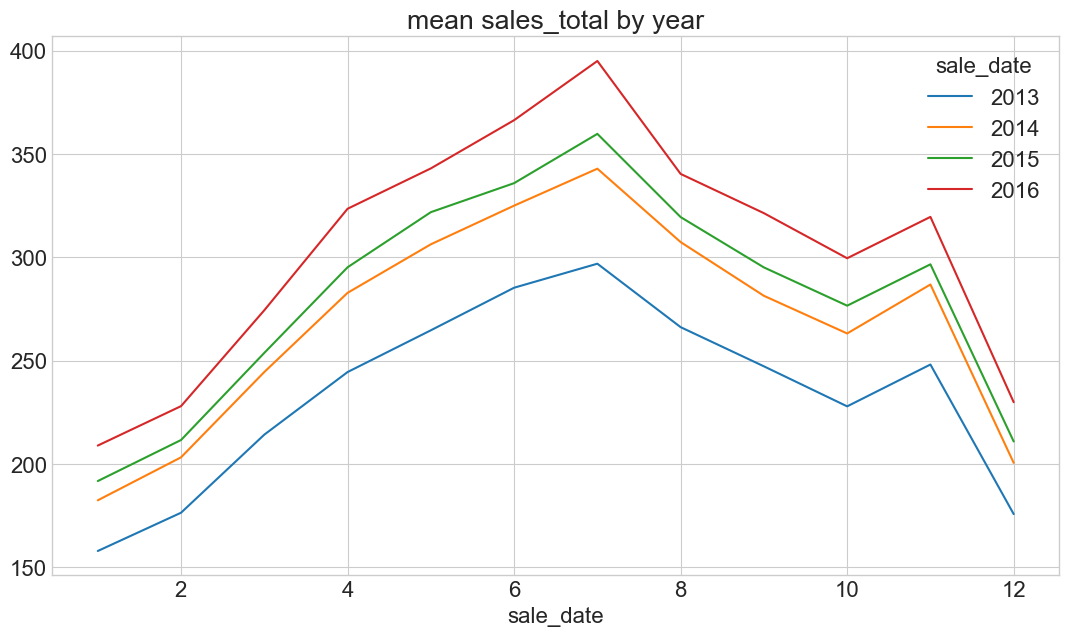

In [19]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean sales_total by year')
plt.show()

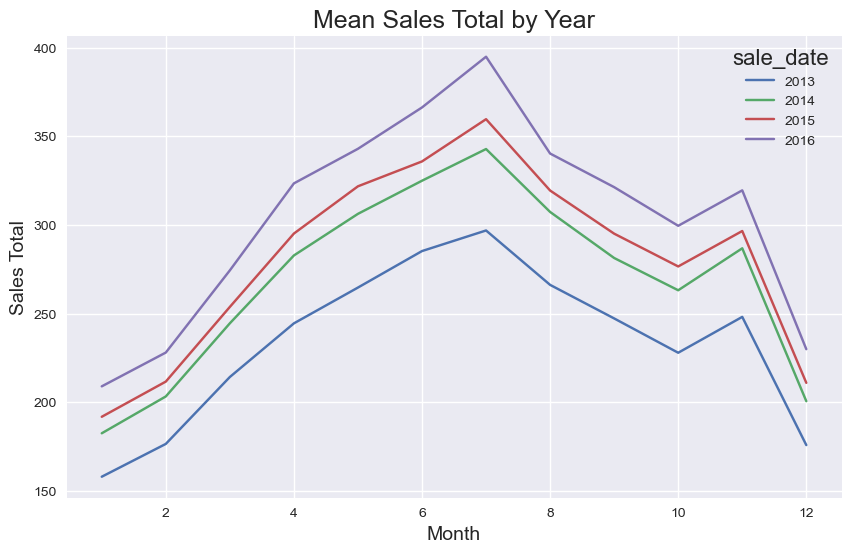

In [52]:
# Set the color scheme
plt.style.use('seaborn')

# Create the plot
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(grid=True, figsize=(10,6))

# Add a title and adjust the font size
plt.title('Mean Sales Total by Year', fontsize=18)

# Add labels to the x and y axes and adjust the font size
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales Total', fontsize=14)

# Show the plot
plt.show()

### Observation:
* Consistent over the years with only increasing probably from inflation.

In [21]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,157.894723,176.411855,214.181650,244.460082,264.663123,285.261279,296.881241,266.183375,247.237694,227.868064,248.108656,175.753692
2014,182.410791,203.207122,244.488991,282.786091,306.267538,324.965376,342.849100,307.345466,281.350430,263.133772,286.821036,200.538977
2015,191.725206,211.589839,253.739390,295.147608,321.813672,335.850784,359.698008,319.435676,295.088416,276.572155,296.583045,210.886208
2016,208.900519,227.977512,274.367406,323.461873,342.986382,366.316222,394.953287,340.315372,321.333920,299.518321,319.532559,229.882967


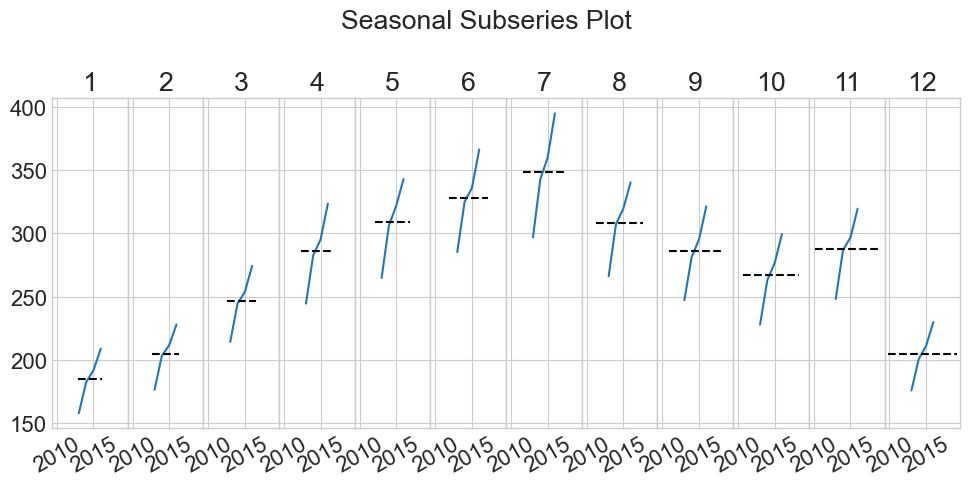

In [28]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [42]:
train['y(t + 1)'] = train.sales_total.shift(-1)
train.head()

,month,day_of_week,year,sales_total,y(t + 1)
sale_date,,,,,
2013-01-01,1,1,2013,10.92,30.16
2013-01-01,1,1,2013,30.16,308.48
2013-01-01,1,1,2013,308.48,197.55
2013-01-01,1,1,2013,197.55,25.16
2013-01-01,1,1,2013,25.16,162.98


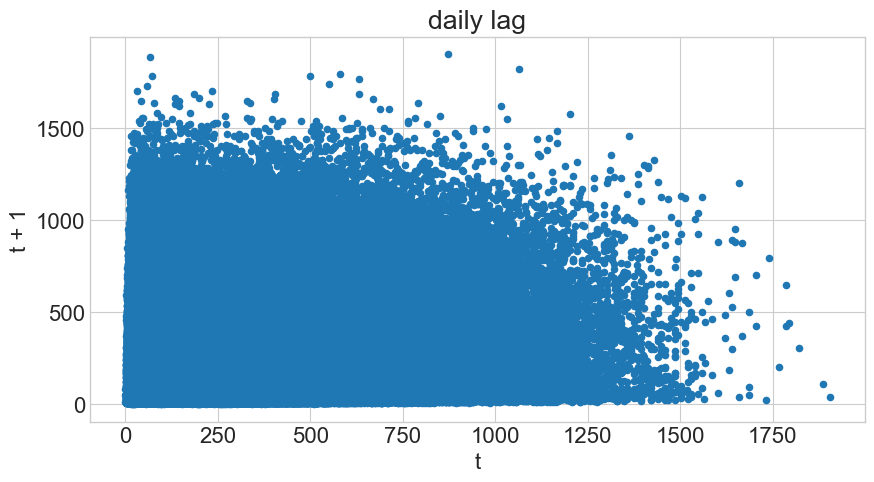

In [43]:
train.plot.scatter(x='sales_total', y='y(t + 1)').set(xlabel='t', ylabel='t + 1')
plt.title('daily lag')
plt.show()

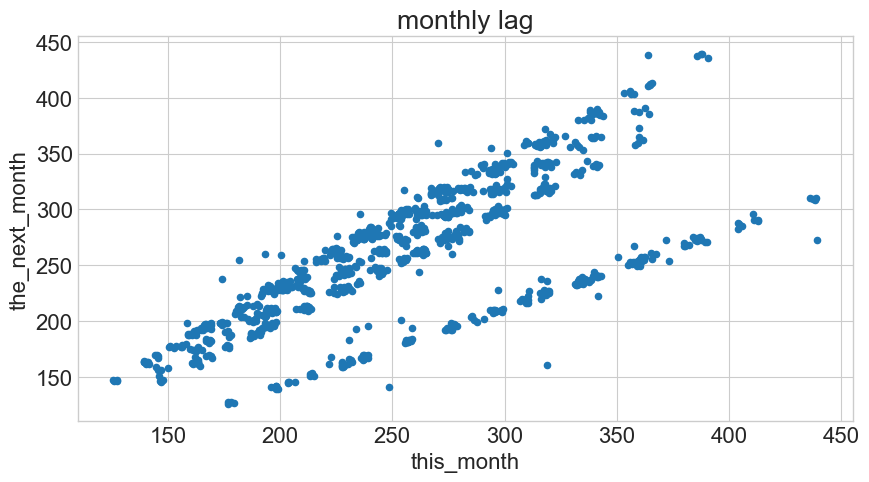

In [47]:
monthly = train.resample('b').mean().drop(columns='y(t + 1)')
monthly['the_next_month'] = monthly.sales_total.shift(-1)
monthly = monthly.rename(columns={'sales_total': 'this_month'})
monthly.plot.scatter(x='this_month', y='the_next_month')
plt.title('monthly lag')
plt.show()

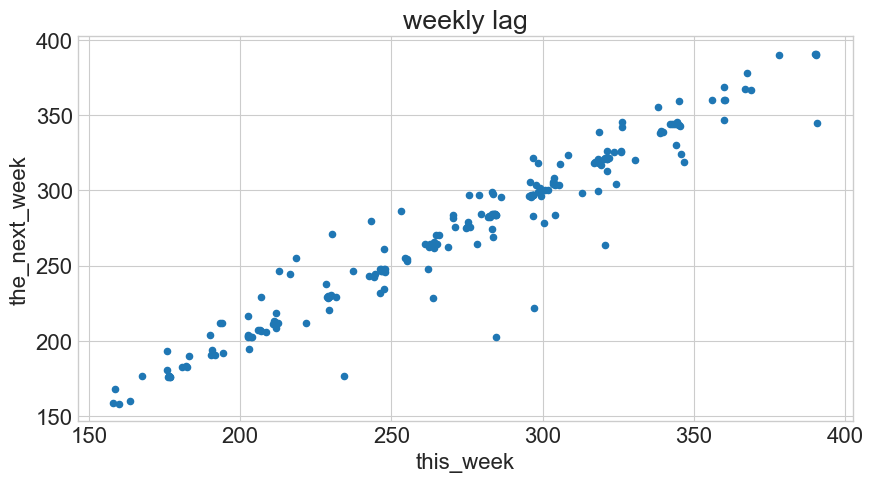

In [49]:
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
plt.title('weekly lag')
plt.show()

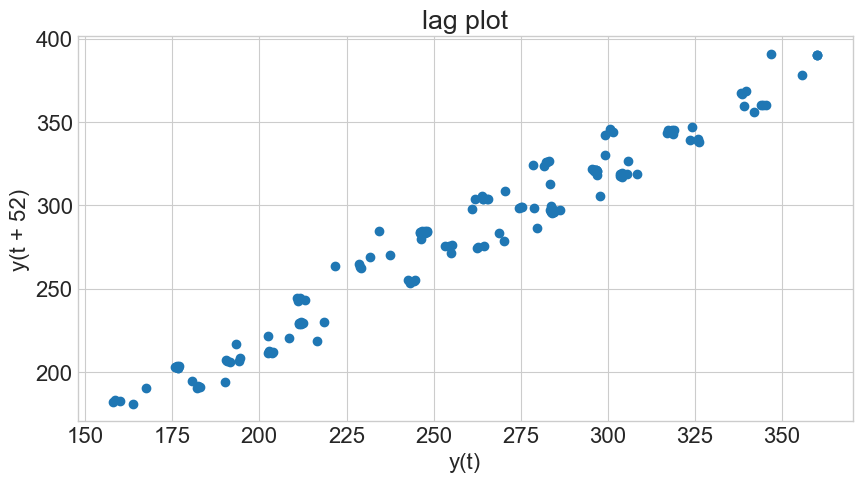

In [50]:
#same thing, but easier
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=52)
plt.title('lag plot');

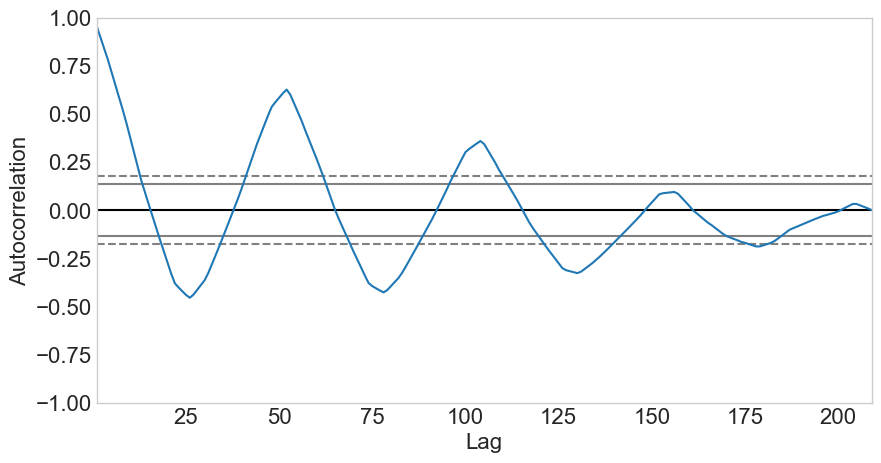

In [51]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.show()

In [65]:
import statsmodels.api as sm

In [67]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)

In [68]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

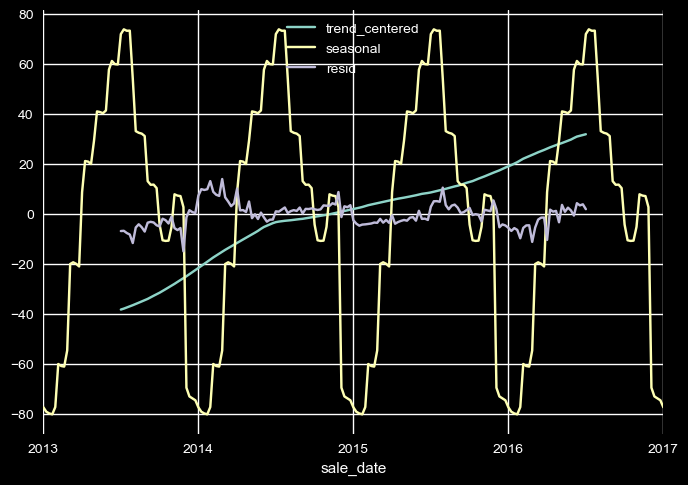

In [69]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();